In [0]:
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [0]:
cd '/drive/My Drive/AFC_Project_data/'

/drive/.shortcut-targets-by-id/153UGg9jSt1C_ZcZyrsMvAqhvGzqkjrjf/AFC_Project_data


In [0]:
import os
import numpy as np
import pandas as pd
import json
from tqdm import tqdm

In [0]:
cd '/drive/My Drive/AFC_Project_data/AFEW_data/processed_images/'

/drive/.shortcut-targets-by-id/153UGg9jSt1C_ZcZyrsMvAqhvGzqkjrjf/AFC_Project_data/AFEW_data/processed_images


In [0]:
subfolders = os.listdir(".")
subfolders.sort()

In [0]:
d = {}

In [0]:
uniqarousal = []
uniqvalence = []

for subfolder in tqdm(subfolders):
  if subfolder == "README.md":
    continue
  path = "./" + subfolder + "/" + subfolder + ".json"
  with open(path, "r") as read_file:
    jsonfile = json.load(read_file)
  num_frames = len(jsonfile['frames'].keys())
  frames = list(jsonfile['frames'].keys())
  frames.sort()
  frameobj = jsonfile['frames']
  # print(subfolder, num_frames)
  for frame in frames:
    imgobj = frameobj[frame]
    ar = imgobj['arousal']
    va = imgobj['valence']
    name = subfolder + "_" + frame
    d[name] = [va, ar]
    if ar not in uniqarousal:
      uniqarousal.append(ar)
    if va not in uniqvalence:
      uniqvalence.append(va)

100%|██████████| 601/601 [00:04<00:00, 140.50it/s]


In [0]:
with open('/drive/My Drive/AFC_Project_data/AFEW_va.json', 'w') as fp:
  # json.dump(sample, fp)
  json.dump(d, fp)

In [0]:
uniqarousal.sort()
uniqvalence.sort()
print(uniqarousal, len(uniqarousal))
print(uniqvalence, len(uniqvalence))

[-7.0, -6.0, -5, -4.0, -3.0, -2, -1.0, 0.0, 1, 2, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9] 17
[-10, -9.0, -8.0, -7.0, -6.0, -5.0, -4, -3, -2, -1.0, 0.0, 1, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8] 19


In [0]:
# Test, Train, Val Sets:
# Train - 1 to 540 = 540 actors
# Val = 20% of Train
# Test1 - 541 - 600 = 60 actors
# Test2 - IMFDB

In [0]:
cd '/drive/My Drive/AFC_Project_data/AffectNet_data/'

/drive/.shortcut-targets-by-id/153UGg9jSt1C_ZcZyrsMvAqhvGzqkjrjf/AFC_Project_data/AffectNet_data


In [0]:
cnt = 0
names = []
for root, dirs, files in os.walk("."):
  print(root, dirs, files)
  break
  cnt += 1
  if cnt == 5000:
    break
  names.append(files)

# **Ellipse Sampling**

In [0]:
cd '/drive/My Drive/AFC_Project_data/AffectNet/annotation/'

/drive/.shortcut-targets-by-id/153UGg9jSt1C_ZcZyrsMvAqhvGzqkjrjf/AFC_Project_data/AffectNet/annotation


In [0]:
train = pd.read_csv("training.csv")

In [0]:
train = train[train['valence'] != -2]
train = train[train['arousal'] != -2]

In [0]:
counts = train.groupby(['expression']).count()

In [0]:
means = train.groupby(['expression']).mean()
stds = train.groupby(['expression']).std()

In [0]:
print(means["valence"][0:7], stds["valence"][0:7], means["arousal"][0:7], stds["arousal"][0:7])

expression
0   -0.062719
1    0.664328
2   -0.637006
3    0.180444
4   -0.125745
5   -0.693719
6   -0.452736
Name: valence, dtype: float64 expression
0    0.183525
1    0.162671
2    0.221066
3    0.174439
4    0.071007
5    0.151534
6    0.174105
Name: valence, dtype: float64 expression
0   -0.019574
1    0.070280
2   -0.257004
3    0.689328
4    0.766180
5    0.457344
6    0.566778
Name: arousal, dtype: float64 expression
0    0.147558
1    0.166012
2    0.141985
3    0.157603
4    0.136925
5    0.110895
6    0.197566
Name: arousal, dtype: float64


In [0]:
neutral = [ means["valence"][0], stds["valence"][0], means["arousal"][0], stds["arousal"][0] ]
happy = [ means["valence"][1], stds["valence"][1], means["arousal"][1], stds["arousal"][1] ]
sad = [ means["valence"][2], stds["valence"][2], means["arousal"][2], stds["arousal"][2] ]
surprise = [ means["valence"][3], stds["valence"][3], means["arousal"][3], stds["arousal"][3] ]
fear = [ means["valence"][4], stds["valence"][4], means["arousal"][4], stds["arousal"][4] ]
disgust = [ means["valence"][5], stds["valence"][5], means["arousal"][5], stds["arousal"][5] ]
anger = [ means["valence"][6], stds["valence"][6], means["arousal"][6], stds["arousal"][6] ]

In [0]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

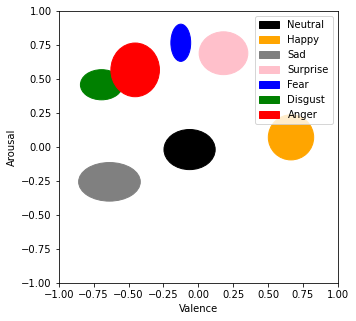

In [0]:
eneu = Ellipse((neutral[0], neutral[2]), neutral[1]*2, neutral[3]*2, color='black')
ehap = Ellipse((happy[0], happy[2]), happy[1]*2, happy[3]*2, color='orange')
esad = Ellipse((sad[0], sad[2]), sad[1]*2, sad[3]*2, color='grey')
esur = Ellipse((surprise[0], surprise[2]), surprise[1]*2, surprise[3]*2, color='pink')
efea = Ellipse((fear[0], fear[2]), fear[1]*2, fear[3]*2, color='blue')
edis = Ellipse((disgust[0], disgust[2]), disgust[1]*2, disgust[3]*2, color='green')
eang = Ellipse((anger[0], anger[2]), anger[1]*2, anger[3]*2, color='red')


fig, ax = plt.subplots(figsize=(5, 5))
ax.add_artist(eneu)
ax.add_artist(ehap)
ax.add_artist(esad)
ax.add_artist(esur)
ax.add_artist(efea)
ax.add_artist(edis)
ax.add_artist(eang)
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.set_xlabel("Valence")
ax.set_ylabel("Arousal")
ax.legend([eneu, ehap, esad, esur, efea, edis, eang], ["Neutral", "Happy", "Sad", "Surprise", "Fear", "Disgust", "Anger"])
plt.show()

In [0]:
cd '/drive/My Drive/AFC_Project_data/IMFDB_data/IMFDB_final/'

/drive/.shortcut-targets-by-id/153UGg9jSt1C_ZcZyrsMvAqhvGzqkjrjf/AFC_Project_data/IMFDB_data/IMFDB_final


In [0]:
actors = os.listdir(".")
actors.sort()
actors = actors[1:]

In [0]:
np.random.seed(seed=5230)
def sample_ellipse(c, a, b):
  rho = np.random.uniform(0, 1)
  theta = np.random.uniform(0, 2 * np.pi)
  x = np.sqrt(rho) * np.cos(theta)
  y = np.sqrt(rho) * np.sin(theta)
  x = x * a + c[0]
  y = y * b + c[1]
  return [x, y]

In [0]:
d_IMFDB_label = {}
d_IMFDB_va = {}
freq_IMFDB_labels = {"NEUTRAL": 0, "HAPPINESS": 0, "SADNESS": 0, "SURPRISE": 0, "FEAR": 0, "DISGUST": 0, "ANGER": 0}
for actor in actors:
  movies = os.listdir("./" + actor + "/")
  movies.sort()
  for movie in movies:
    if movie == ".DS_Store" or (movie == "3Idiots" and actor == "Madhavan") or (movie == "Dhwani" and actor == "PremaNazir") or (movie == "Extras" and actor == "Bharathi") or (movie == "Twenty-20" and actor == "Jagathi") or (movie == "KuchKuchhotahai" and actor == "Kajol") or (movie == "Twenty-20" and actor == "Mamootty") or (movie == "extras_Malla" and actor == "Pavithralokesh") or (movie == "extras_NayiNeralu" and actor == "Pavithralokesh") or (movie == "extras_Raakshasudu" and actor == "Pavithralokesh") or (movie == "Annamayya" and actor == "RamyaKrishna") or (movie == "KuchKuchhotahai" and actor == "Ranimukherji") or (movie == "Dhwani" and actor == "Shobana") or (movie == "Extras" and actor == "Bharathi") or (movie == "Twenty-20" and actor == "Jagathi") or (movie == "KuchKuchhotahai" and actor == "Kajol") or (movie == "Twenty-20" and actor == "Mamootty") or (movie == "extras_Malla" and actor == "Pavithralokesh") or (movie == "extras_NayiNeralu" and actor == "Pavithralokesh") or (movie == "extras_Raakshasudu" and actor == "Pavithralokesh") or (movie == "Annamayya" and actor == "RamyaKrishna") or (movie == "KuchKuchhotahai" and actor == "Ranimukherji") or (movie == "Dhwani" and actor == "Thilakan"):
      continue
    txtfile = open("./" + actor + "/" + movie + "/" + movie + ".txt", 'r')
    lines = txtfile.readlines()

    for line in lines:
      try:
        arr = line.split("\t")
        key = movie + "_" + arr[2]
        assert arr[11] in ["NEUTRAL", "HAPPINESS", "SADNESS", "SURPRISE", "FEAR", "DISGUST", "ANGER"]
        d_IMFDB_label[key] = arr[11]
        freq_IMFDB_labels[arr[11]] += 1
        if arr[11] == "NEUTRAL":
          d_IMFDB_va[key] = sample_ellipse((neutral[0], neutral[2]), neutral[1], neutral[3])
        elif arr[11] == "HAPPINESS":
          d_IMFDB_va[key] = sample_ellipse((happy[0], happy[2]), happy[1], happy[3])
        elif arr[11] == "SADNESS":
          d_IMFDB_va[key] = sample_ellipse((sad[0], sad[2]), sad[1], sad[3])
        elif arr[11] == "SURPRISE":
          d_IMFDB_va[key] = sample_ellipse((surprise[0], surprise[2]), surprise[1], surprise[3])
        elif arr[11] == "FEAR":
          d_IMFDB_va[key] = sample_ellipse((fear[0], fear[2]), fear[1], fear[3])
        elif arr[11] == "DISGUST":
          d_IMFDB_va[key] = sample_ellipse((disgust[0], disgust[2]), disgust[1], disgust[3])
        elif arr[11] == "ANGER":
          d_IMFDB_va[key] = sample_ellipse((anger[0], anger[2]), anger[1], anger[3])
      except:
        continue 

In [0]:
d_IMFDB_va_discrete = {}
for keyy in d_IMFDB_va:
  a, b = d_IMFDB_va[keyy]
  newa = int(round(a * 10))
  newb = int(round(b * 10))
  d_IMFDB_va_discrete[keyy] = [newa, newb]

In [0]:
with open("/drive/My Drive/AFC_Project_data/IMFDB_data/IMFDB_va.json", "r") as read_file:
    d_IMFDB_va_old = json.load(read_file)
with open("/drive/My Drive/AFC_Project_data/IMFDB_data/IMFDB_labels.json", "r") as read_file:
    d_IMFDB_label_old = json.load(read_file)

In [0]:
colours = {"NEUTRAL": 'black', "HAPPINESS": 'orange', "SADNESS": 'grey', "SURPRISE": 'pink', "FEAR": 'blue', "DISGUST": 'green', "ANGER": 'red'}

  3%|▎         | 988/29700 [00:04<02:24, 198.91it/s]


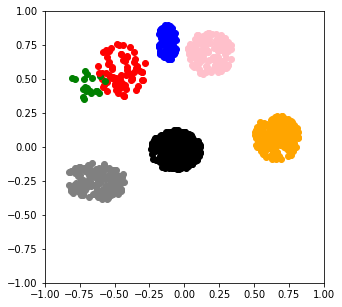

In [0]:
plt.figure(figsize=(5,5))
cnt = 0
for k in tqdm(d_IMFDB_label_old):
  col = colours[d_IMFDB_label_old[k]]
  x, y = d_IMFDB_va_old[k]
  plt.scatter(x, y, c=col)
  cnt += 1
  if cnt == 1000:
    break

plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

  3%|▎         | 990/29700 [00:05<02:25, 197.76it/s]


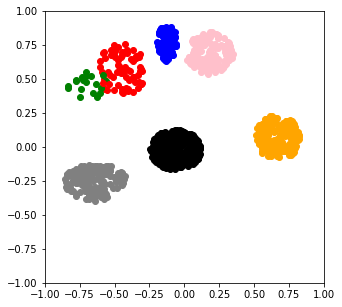

In [0]:
cnt = 0
plt.figure(figsize=(5,5))
for k in tqdm(d_IMFDB_label):
  col = colours[d_IMFDB_label[k]]
  x, y = d_IMFDB_va[k]
  plt.scatter(x, y, c=col)
  cnt += 1
  if cnt == 1000:
    break

plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

 34%|███▎      | 9999/29700 [04:47<17:26, 18.83it/s]

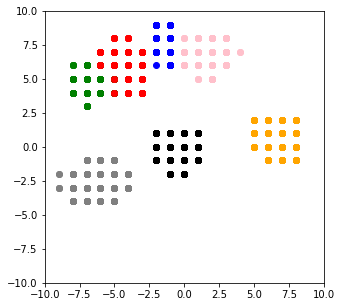

In [0]:
cnt = 0
plt.figure(figsize=(5,5))
for k in tqdm(d_IMFDB_label):
  col = colours[d_IMFDB_label[k]]
  x, y = d_IMFDB_va_discrete[k]
  plt.scatter(x, y, c=col)
  cnt += 1
  if cnt == 10000:
    break

plt.xlim((-10,10))
plt.ylim((-10,10))
plt.show()

In [0]:
# with open('/drive/My Drive/AFC_Project_data/IMFDB_va_discrete.json', 'w') as fp:
#   json.dump(d_IMFDB_va_discrete, fp)

In [0]:
# with open('/drive/My Drive/AFC_Project_data/IMFDB_va.json', 'w') as fp:
#   json.dump(d_IMFDB_va, fp)

In [0]:
# with open('/drive/My Drive/AFC_Project_data/IMFDB_labels.json', 'w') as fp:
#   json.dump(d_IMFDB_label, fp)

In [0]:
freq_IMFDB_labels

{'ANGER': 2811,
 'DISGUST': 3815,
 'FEAR': 621,
 'HAPPINESS': 8454,
 'NEUTRAL': 9617,
 'SADNESS': 3726,
 'SURPRISE': 1748}

<BarContainer object of 7 artists>

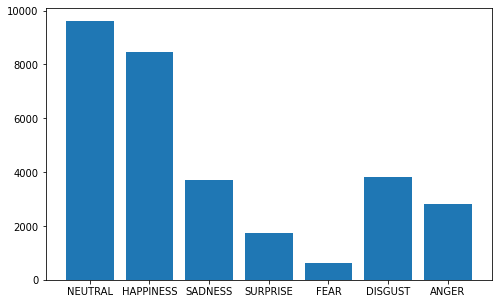

In [0]:
#IMFDB
plt.figure(figsize=(8, 5))
plt.bar(["NEUTRAL", "HAPPINESS", "SADNESS", "SURPRISE", "FEAR", "DISGUST", "ANGER"], [freq_IMFDB_labels["NEUTRAL"], freq_IMFDB_labels["HAPPINESS"], freq_IMFDB_labels["SADNESS"], freq_IMFDB_labels["SURPRISE"], freq_IMFDB_labels["FEAR"], freq_IMFDB_labels["DISGUST"], freq_IMFDB_labels["ANGER"]])

<BarContainer object of 7 artists>

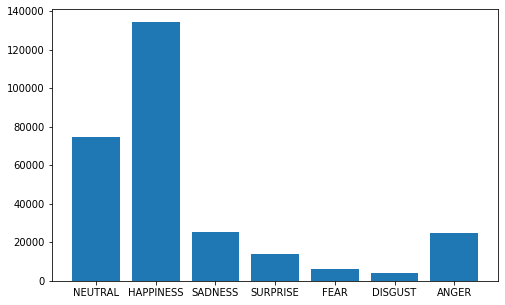

In [0]:
#Affectnet
plt.figure(figsize=(8, 5))
plt.bar(["NEUTRAL", "HAPPINESS", "SADNESS", "SURPRISE", "FEAR", "DISGUST", "ANGER"], list(counts[0:7]["valence"]))

# **Transfer images**

In [0]:
import subprocess
import shutil

In [0]:
with open("/drive/My Drive/AFC_Project_data/IMFDB_data/IMFDB_labels.json", "r") as read_file:
    d_IMFDB_label = json.load(read_file)
with open("/drive/My Drive/AFC_Project_data/IMFDB_data/IMFDB_va.json", "r") as read_file:
    d_IMFDB_va = json.load(read_file)
assert len(d_IMFDB_va) == len(d_IMFDB_label)

In [0]:
# for folder in tqdm(os.listdir("/drive/My Drive/AFC_Project_data/IMFDB_data/processed_images/")):
#   if folder == "allimages" or folder == ".DS_Store":
#     continue
#   for image in os.listdir("/drive/My Drive/AFC_Project_data/IMFDB_data/processed_images/" + folder):
#     pathfrom = "/drive/My Drive/AFC_Project_data/IMFDB_data/processed_images/" + folder + "/" + image
#     pathto = "/drive/My Drive/AFC_Project_data/IMFDB_data/processed_images/allimages/"
#     if os.path.isfile(pathto + image):
#       continue
#     shutil.copy(pathfrom, pathto)

In [0]:
for key in tqdm(d_IMFDB_va):
  ind = key.find("_")
  array = key.split("_")
  actor = array[1]
  image = key[ind+1:]
  pathfrom = "/drive/My Drive/AFC_Project_data/IMFDB_data/processed_images/allimages/" + key
  pathto = "/drive/My Drive/AFC_Project_data/IMFDB_data/final_images/train/"
  try:
    if os.path.isfile(pathto + key):
      continue
    shutil.copy(pathfrom, pathto)
  except:
    continue

100%|██████████| 29700/29700 [51:09<00:00,  9.68it/s]


In [0]:
print(len(os.listdir("/drive/My Drive/AFC_Project_data/IMFDB_data/final_images/train/")))

29171


# **Clustering**

In [0]:
# AFEW - integer va, no labels
# Affectnet - continuous v, labels
# IFMDB - no va, only labels

In [0]:
# AFEW ellipses

In [0]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [0]:
with open("/drive/My Drive/AFC_Project_data/AFEW_data/AFEW_va.json", "r") as read_file:
    jsonfile = json.load(read_file)

In [0]:
values = list(jsonfile.values())
values = np.array(values)

In [0]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [0]:
model = GaussianMixture(n_components=7, covariance_type='spherical', random_state=0)
model2 = KMeans(n_clusters=7, random_state=0)

In [0]:
model.fit(values)
model2.fit(values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [0]:
model3a = GaussianMixture(n_components=7, covariance_type='spherical', random_state=0)
model3b = GaussianMixture(n_components=7, covariance_type='spherical', random_state=0)
model4a = KMeans(n_clusters=7, random_state=0)
model4b = KMeans(n_clusters=7, random_state=0)

In [0]:
model4a.fit(values[:,0].reshape(-1,1))
model4b.fit(values[:,1].reshape(-1,1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

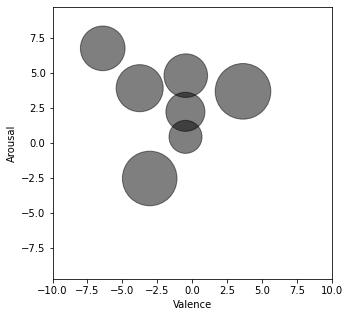

In [0]:
colors = ['black', 'black', 'black', 'black', 'black', 'black', 'black']

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = matplotlib.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_xlabel("Valence")
ax.set_ylabel("Arousal")
make_ellipses(model, ax)
plt.show()

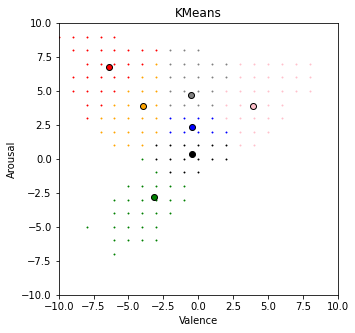

In [0]:
colors = ['black', 'red', 'blue', 'orange', 'pink', 'grey', 'green']
k_means_labels = model2.predict(values)
k_means_cluster_centers = model2.cluster_centers_

fig, ax = plt.subplots(figsize=(5, 5))
for k, col in zip(range(7), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(values[my_members, 0], values[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_xlabel("Valence")
ax.set_ylabel("Arousal")
plt.show()

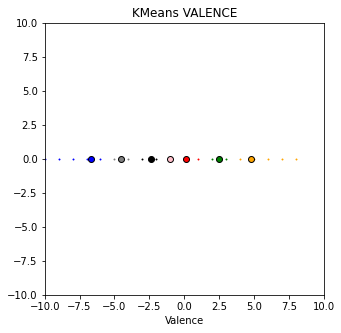

In [0]:
colors = ['black', 'red', 'blue', 'orange', 'pink', 'grey', 'green']
k_means_labels = model4a.predict(values[:,0].reshape(-1, 1))
k_means_cluster_centers = model4a.cluster_centers_

fig, ax = plt.subplots(figsize=(5, 5))
for k, col in zip(range(7), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(values[my_members, 0], [0]*len(values[my_members, 0]), 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], 0, 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans VALENCE')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_xlabel("Valence")
plt.show()

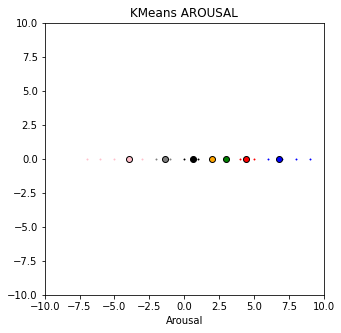

In [0]:
colors = ['black', 'red', 'blue', 'orange', 'pink', 'grey', 'green']
k_means_labels = model4b.predict(values[:,1].reshape(-1, 1))
k_means_cluster_centers = model4b.cluster_centers_

fig, ax = plt.subplots(figsize=(5, 5))
for k, col in zip(range(7), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(values[my_members, 1], [0]*len(values[my_members, 1]), 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], 0, 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans AROUSAL')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_xlabel("Arousal")
plt.show()

In [0]:
with open("/drive/My Drive/AFC_Project_data/IMFDB_data/IMFDB_va.json", "r") as read_file:
    jsonfile = json.load(read_file)

In [0]:
values = np.array(list(jsonfile.values()))

In [0]:
values = values * 10

In [0]:
values = values.round()

In [0]:
values

array([[ 0., -1.],
       [ 1.,  1.],
       [ 1., -0.],
       ...,
       [-5.,  6.],
       [-1.,  0.],
       [ 7.,  1.]])

In [0]:
model.fit(values)

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

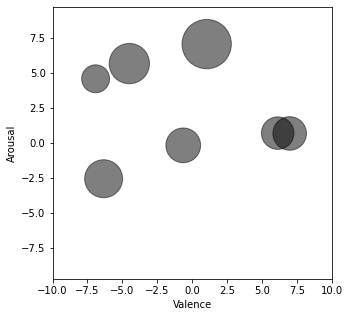

In [0]:
colors = ['black', 'black', 'black', 'black', 'black', 'black', 'black']

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = matplotlib.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.set_xlabel("Valence")
ax.set_ylabel("Arousal")
make_ellipses(model, ax)
plt.show()